# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.interpolate import griddata
from itertools import product
import pyslha

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load Relic Density scan 

In [2]:
scanSummary = '../data/maddmOutput/scan2/output/scan_run_01.txt'
with open(scanSummary,'r') as f:
    headerLines = [l for l in f.readlines() if l.strip() and l.strip()[0] == '#']
columnLabels = {eval(re.sub(r'\b0', '',h.split(':')[0].replace('[','').replace(']','').replace('#',''))) : 
                     h.split(':')[1].replace('\n','').strip().replace('%','pc') for h in headerLines}
header = ['']*len(columnLabels)
for i,label in columnLabels.items():
    header[i-1] = label
relicData = pd.read_csv(scanSummary,names=header,
                        comment='#',delimiter='\t',index_col=False)
# Remove unused columns:
relicData.drop(columns=[c for c in relicData.columns if 'pc_relic' in c]+['Nevents','smearing','xsi','x_f','sigmav(xf)'],inplace=True)
# Rename columns:
renameDict = {'Omegah^2' : 'Omegah2', 'mass#9000006' : 'mChi', 'mass#9900032' : 'mZp', 'mass#9900026' : 'mS'}
relicData.rename(columns=renameDict,inplace=True)
print(relicData.columns)

Index(['run', 'mChi', 'mS', 'mZp', 'Omegah2', 'sigmaN_SI_p', 'lim_sigmaN_SI_p',
       'sigmaN_SI_n', 'lim_sigmaN_SI_n', 'sigmaN_SD_p', 'lim_sigmaN_SD_p',
       'sigmaN_SD_n', 'lim_sigmaN_SD_n'],
      dtype='object')


In [3]:
# Compute r values:
relicData['r_omega'] = relicData['Omegah2']/0.12
relicData['r_SI_p'] = relicData['sigmaN_SI_p']/relicData['lim_sigmaN_SI_p']
relicData['r_SI_n'] = relicData['sigmaN_SI_n']/relicData['lim_sigmaN_SI_n']
relicData['r_SD_p'] = relicData['sigmaN_SD_p']/relicData['lim_sigmaN_SD_p']
relicData['r_SD_n'] = relicData['sigmaN_SD_n']/relicData['lim_sigmaN_SD_n']
relicData['r_dm'] = relicData[['r_omega','r_SI_p','r_SI_n','r_SD_p','r_SD_n']].values.max(1)

### Get Model Parameters

In [15]:
modelPars = pyslha.readSLHAFile('../data/maddmOutput/scan2/Cards/param_card.dat')
gchi = modelPars.blocks['NPINPUTS'][1]
gq = modelPars.blocks['NPINPUTS'][2]
sina = modelPars.blocks['NPINPUTS'][3]
# mS = modelPars.blocks['MASS'][9900026]


textstr = '\n'.join((
    r'$m_S = (m_{Z^\prime}+m_{\chi})/2$',
    r'$g_q =$ %1.2f' %gq,
    r'$g_\chi =$ %1.2f' %gchi,
    r'$\sin\alpha =$ %1.1f' %sina))


### Load ATLAS curve

In [5]:
atlasCurve1 = np.array(list(zip([112.70553064275038, 178.77428998505232, 268.16143497757844, 342.0029895366218, 423.61733931240656, 509.118086696562, 563.5276532137518, 617.9372197309417, 680.1195814648729, 726.7563527653214, 788.9387144992526, 847.2346786248131, 1053.2137518684603, 1173.6920777279522, 1282.5112107623318, 1402.9895366218236, 1573.9910313901344, 1752.7653213751867, 1915.9940209267563, 2129.745889387145],[4.267425320056899, 19.203413940256045, 46.941678520625885, 72.54623044096728, 108.81934566145091, 136.55761024182075, 155.7610241820768, 174.96443812233284, 181.3655761024182, 204.83641536273115, 226.17354196301562, 258.17923186344234, 358.4637268847795, 422.47510668563297, 477.95163584637265, 535.5618776671407, 612.375533428165, 695.5903271692745, 772.4039829302986, 872.6884779516357])))
atlasCurve2 = np.array(list(zip([897.7578475336322, 862.780269058296, 823.9162929745889, 804.4843049327354, 788.9387144992526, 785.0523168908819, 804.4843049327354, 855.0074738415545, 913.3034379671151, 963.8266068759342, 1014.3497757847533, 1080.4185351270553, 1134.8281016442452, 1189.2376681614348, 1247.5336322869955, 1321.3751868460388, 1418.5351270553065],[889.7581792318633, 840.6827880512091, 793.7411095305831, 766.0028449502133, 733.9971550497866, 706.2588904694167, 684.9217638691322, 676.3869132290184, 674.25320056899, 687.0554765291606, 701.9914651493598, 725.4623044096728, 748.9331436699857, 770.2702702702702, 798.00853485064, 832.1479374110952, 872.6884779516357])))

/tmp/ipykernel_8932/263398997.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


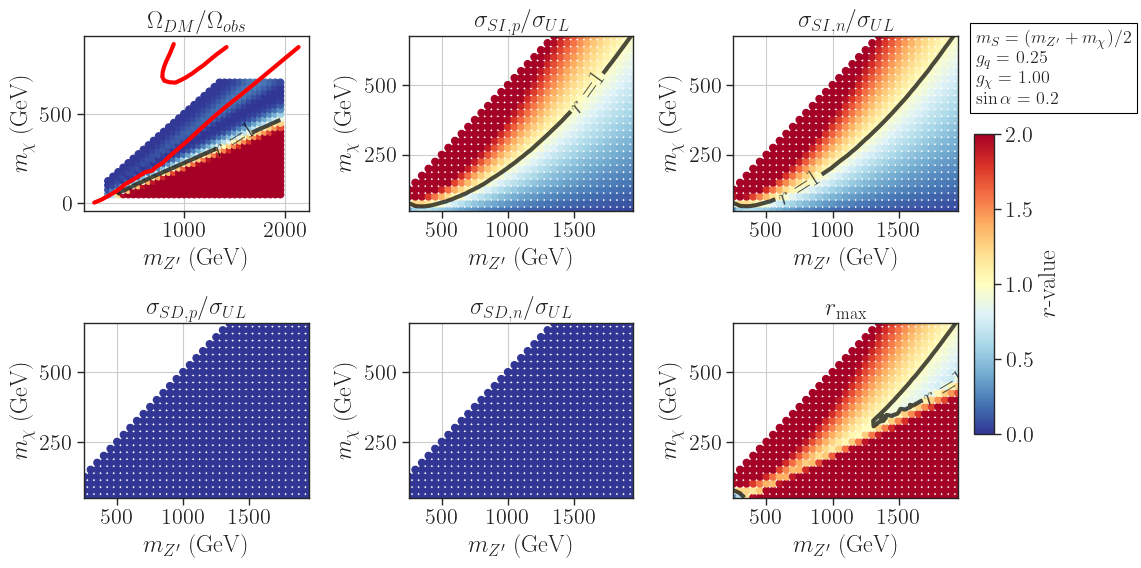

In [29]:
xLabels = ['mZp']
yLabels = ['mChi']
zLabels = ['r_omega','r_SI_p','r_SI_n','r_SD_p','r_SD_n','r_dm']
x_labels = [r'$m_{Z^\prime}$ (GeV)']
y_labels = [r'$m_{\chi}$ (GeV)']
z_labels = [r'$\Omega_{DM}/\Omega_{obs}$',r'$\sigma_{SI,p}/\sigma_{UL}$',r'$\sigma_{SI,n}/\sigma_{UL}$',
            r'$\sigma_{SD,p}/\sigma_{UL}$',r'$\sigma_{SD,n}/\sigma_{UL}$',r'$r_{\rm max}$']

allPlots = list(product(xLabels,yLabels,zLabels))
allLabels = list(product(x_labels,y_labels,z_labels))
nplots = len(allPlots)

fig,axarr = plt.subplots(nrows=int(nplots/3),ncols=3,figsize=(10,6))
axarr = np.array(axarr).reshape(-1)

for iplot,(xLabel,yLabel,zLabel) in enumerate(allPlots):
    ax = axarr[iplot]

    p = ax.scatter(relicData[xLabel],relicData[yLabel],c=relicData[zLabel],s=25,
            cmap=cm, vmin=0.0,vmax=2.0)

    pts = np.array([y for y in product(np.unique(relicData[xLabel]),np.unique(relicData[yLabel]))])
    rPts = griddata(list(zip(relicData[xLabel],relicData[yLabel])),relicData[zLabel],pts)
    pts = pts[~np.isnan(rPts)]
    rPts = rPts[~np.isnan(rPts)]
    cs = ax.tricontour(pts[:,0],pts[:,1], rPts, levels=[1.0], alpha=0.7,linewidths=3,colors='black')
    ax.clabel(cs, levels= [1.0], inline=True, fmt=r'$r = $%1.0f')
    if zLabel == 'r_omega':
        ax.plot(atlasCurve1[:,0],atlasCurve1[:,1],color='red',linewidth=3)
        ax.plot(atlasCurve2[:,0],atlasCurve2[:,1],color='red',linewidth=3)

    
    
    
    ax.set_xlabel(allLabels[iplot][0])
    ax.set_ylabel(allLabels[iplot][1])
    ax.set_title(allLabels[iplot][2])
    # ax.set_xlim(50.0,1.1*x.max())
    # ax.set_ylim(5.0,1.1*y.max())
    # ax.legend()
    ax.grid()

fig.subplots_adjust(right=0.92,top=1.1)
cbar_ax = fig.add_axes([0.99, 0.25, 0.02, 0.5]) 
fig.colorbar(p,label=r'$r$-value',cax=cbar_ax)

plt.text(0.1,1.1,textstr,fontsize=13,bbox=dict(facecolor='white', edgecolor='black'),
            transform = plt.gca().transAxes)
plt.tight_layout()
plt.show()    